In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP thresh 3/*.txt")

# List to hold individual DataFrames
dfs = []

# Iterate through each file in the directory
for file in list_dir:
    # Read the file into a DataFrame
    #file_path = os.path.join(directory, filename)
    df = pd.read_csv(file) #, delimiter='\t')  # Assuming tab-separated values
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as CSV
merged_df.to_csv("merged_data.csv", index=False)
dataset=merged_df
dataset


,Unnamed: 0,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,Target,Stimulation
0,0,0.029989,0.023791,0.050000,0.025455,0.301780,0.317919,0.814444,0.185555,4.704015e-07,0.0,1.0
1,0,0.030000,0.023087,0.050000,0.025142,0.273312,0.328372,0.813396,0.186604,3.058176e-12,0.0,1.0
2,0,0.028645,0.024061,0.050000,0.029190,0.180386,0.221539,0.804252,0.195748,2.771986e-30,0.0,1.0
3,0,0.030000,0.024694,0.050000,0.017556,0.272991,0.290797,0.918604,0.081396,5.773332e-11,0.0,1.0
4,0,0.030000,0.024102,0.051366,0.010000,0.255269,0.292689,0.917414,0.082586,2.747613e-15,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,0.030000,0.024695,0.059022,0.036943,0.100000,0.106931,0.435041,0.311040,2.539190e-01,0.0,0.0
806,0,0.030000,0.026658,0.053893,0.049967,0.100000,0.123759,0.376015,0.450747,1.732381e-01,0.0,0.0
807,0,0.029975,0.025515,0.056269,0.033665,0.102328,0.103310,0.341048,0.360353,2.985997e-01,0.0,0.0
808,0,0.030000,0.022255,0.052986,0.031594,0.100000,0.098919,0.366657,0.305299,3.280442e-01,0.0,0.0


dataset = pd.read_csv('Data after PP/Data')

In [7]:
dataset = dataset.drop(['Unnamed: 0'],axis=1)
#dataset = dataset[dataset['Stimulation'] != 1]
dataset

,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,Target,Stimulation
0,0.029989,0.023791,0.050000,0.025455,0.301780,0.317919,0.814444,0.185555,4.704015e-07,0.0,1.0
1,0.030000,0.023087,0.050000,0.025142,0.273312,0.328372,0.813396,0.186604,3.058176e-12,0.0,1.0
2,0.028645,0.024061,0.050000,0.029190,0.180386,0.221539,0.804252,0.195748,2.771986e-30,0.0,1.0
3,0.030000,0.024694,0.050000,0.017556,0.272991,0.290797,0.918604,0.081396,5.773332e-11,0.0,1.0
4,0.030000,0.024102,0.051366,0.010000,0.255269,0.292689,0.917414,0.082586,2.747613e-15,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
805,0.030000,0.024695,0.059022,0.036943,0.100000,0.106931,0.435041,0.311040,2.539190e-01,0.0,0.0
806,0.030000,0.026658,0.053893,0.049967,0.100000,0.123759,0.376015,0.450747,1.732381e-01,0.0,0.0
807,0.029975,0.025515,0.056269,0.033665,0.102328,0.103310,0.341048,0.360353,2.985997e-01,0.0,0.0
808,0.030000,0.022255,0.052986,0.031594,0.100000,0.098919,0.366657,0.305299,3.280442e-01,0.0,0.0


In [8]:
dataset['Target'].value_counts()

0.0    405
1.0    405
Name: Target, dtype: int64

In [9]:
dataset['Target'].value_counts(1)

0.0    0.5
1.0    0.5
Name: Target, dtype: float64

In [10]:
X = dataset.drop(['Target'],axis=1)
y= dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

# Standardization

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# CV

In [11]:
cv = StratifiedKFold(4)

# PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7,svd_solver='full')
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(pca.fit(X_train).explained_variance_ratio_)

[6.96565297e-01 2.24472510e-01 4.59572598e-02 2.87573420e-02
 3.34218991e-03 6.38716200e-04 1.38321899e-04]


# Classification Tree

In [13]:
params = {'max_depth':np.linspace(2,10,dtype='int'),'criterion':['gini','entropy']}

clf = DecisionTreeClassifier(random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)

gs=gs.fit(X_train,y_train)

gs_pca = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)
gs_pca = gs_pca.fit(X_train_pca,y_train)

## CT metrics

In [14]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)
print('\n\n Result with PCA\n')
print("Best parameters set found :",gs_pca.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs_pca.predict(X_test_pca)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)

Best parameters set found : {'criterion': 'entropy', 'max_depth': 2} 

Classification report on Test set

Accuracy:  0.97
Recall:  0.96
Precision:  0.98
ROC AUC:  0.97


 Result with PCA

Best parameters set found : {'criterion': 'gini', 'max_depth': 2} 

Classification report on Test set

Accuracy:  0.966
Recall:  0.95
Precision:  0.98
ROC AUC:  0.965


## CT matrix

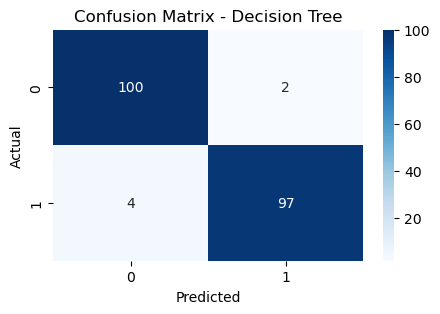

In [15]:
# Assuming clf is your trained DecisionTreeClassifier
y_pred = gs.predict(X_test)  # Use gs instead of clf if you want to use the grid search optimized model

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


## CT feature info

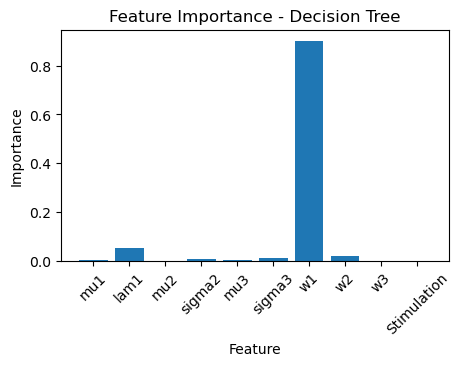

In [16]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming X_train is your feature matrix and y_train is your target
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(5, 3))
plt.bar(X.columns, tree.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.xticks(rotation=45)
plt.show()


# Random Forest

In [61]:
params = {'n_estimators':np.linspace(10,150,dtype='int',num=10),'max_depth':np.linspace(2,5,dtype='int'),'criterion':['gini','entropy']}

clf = RandomForestClassifier(n_jobs=-1,random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,verbose=10,n_jobs=-1)

gs=gs.fit(X_train,y_train)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits
[CV 1/4; 1/1000] START criterion=gini, max_depth=2, n_estimators=10.............
[CV 1/4; 1/1000] END criterion=gini, max_depth=2, n_estimators=10;, score=0.990 total time=   0.1s
[CV 3/4; 2/1000] START criterion=gini, max_depth=2, n_estimators=25.............
[CV 3/4; 2/1000] END criterion=gini, max_depth=2, n_estimators=25;, score=1.000 total time=   0.2s
[CV 4/4; 3/1000] START criterion=gini, max_depth=2, n_estimators=41.............
[CV 4/4; 3/1000] END criterion=gini, max_depth=2, n_estimators=41;, score=0.989 total time=   0.2s
[CV 3/4; 4/1000] START criterion=gini, max_depth=2, n_estimators=56.............
[CV 3/4; 4/1000] END criterion=gini, max_depth=2, n_estimators=56;, score=0.999 total time=   0.3s
[CV 3/4; 5/1000] START criterion=gini, max_depth=2, n_estimators=72.............
[CV 3/4; 5/1000] END criterion=gini, max_depth=2, n_estimators=72;, score=0.999 total time=   0.4s
[CV 3/4; 6/1000] START criterion=gi

[CV 4/4; 1/1000] START criterion=gini, max_depth=2, n_estimators=10.............
[CV 4/4; 1/1000] END criterion=gini, max_depth=2, n_estimators=10;, score=0.983 total time=   0.1s
[CV 4/4; 2/1000] START criterion=gini, max_depth=2, n_estimators=25.............
[CV 4/4; 2/1000] END criterion=gini, max_depth=2, n_estimators=25;, score=0.985 total time=   0.2s
[CV 3/4; 3/1000] START criterion=gini, max_depth=2, n_estimators=41.............
[CV 3/4; 3/1000] END criterion=gini, max_depth=2, n_estimators=41;, score=0.999 total time=   0.3s
[CV 4/4; 4/1000] START criterion=gini, max_depth=2, n_estimators=56.............
[CV 4/4; 4/1000] END criterion=gini, max_depth=2, n_estimators=56;, score=0.984 total time=   0.4s
[CV 4/4; 5/1000] START criterion=gini, max_depth=2, n_estimators=72.............
[CV 4/4; 5/1000] END criterion=gini, max_depth=2, n_estimators=72;, score=0.983 total time=   0.4s
[CV 4/4; 6/1000] START criterion=gini, max_depth=2, n_estimators=87.............
[CV 4/4; 6/1000] EN

[CV 2/4; 1/1000] START criterion=gini, max_depth=2, n_estimators=10.............
[CV 2/4; 1/1000] END criterion=gini, max_depth=2, n_estimators=10;, score=0.978 total time=   0.1s
[CV 1/4; 2/1000] START criterion=gini, max_depth=2, n_estimators=25.............
[CV 1/4; 2/1000] END criterion=gini, max_depth=2, n_estimators=25;, score=0.994 total time=   0.2s
[CV 2/4; 3/1000] START criterion=gini, max_depth=2, n_estimators=41.............
[CV 2/4; 3/1000] END criterion=gini, max_depth=2, n_estimators=41;, score=0.967 total time=   0.2s
[CV 1/4; 4/1000] START criterion=gini, max_depth=2, n_estimators=56.............
[CV 1/4; 4/1000] END criterion=gini, max_depth=2, n_estimators=56;, score=0.999 total time=   0.3s
[CV 2/4; 5/1000] START criterion=gini, max_depth=2, n_estimators=72.............
[CV 2/4; 5/1000] END criterion=gini, max_depth=2, n_estimators=72;, score=0.967 total time=   0.4s
[CV 2/4; 6/1000] START criterion=gini, max_depth=2, n_estimators=87.............
[CV 2/4; 6/1000] EN

[CV 3/4; 1/1000] START criterion=gini, max_depth=2, n_estimators=10.............
[CV 3/4; 1/1000] END criterion=gini, max_depth=2, n_estimators=10;, score=0.997 total time=   0.1s
[CV 2/4; 2/1000] START criterion=gini, max_depth=2, n_estimators=25.............
[CV 2/4; 2/1000] END criterion=gini, max_depth=2, n_estimators=25;, score=0.967 total time=   0.2s
[CV 1/4; 3/1000] START criterion=gini, max_depth=2, n_estimators=41.............
[CV 1/4; 3/1000] END criterion=gini, max_depth=2, n_estimators=41;, score=0.999 total time=   0.3s
[CV 2/4; 4/1000] START criterion=gini, max_depth=2, n_estimators=56.............
[CV 2/4; 4/1000] END criterion=gini, max_depth=2, n_estimators=56;, score=0.967 total time=   0.3s
[CV 1/4; 5/1000] START criterion=gini, max_depth=2, n_estimators=72.............
[CV 1/4; 5/1000] END criterion=gini, max_depth=2, n_estimators=72;, score=1.000 total time=   0.4s
[CV 1/4; 6/1000] START criterion=gini, max_depth=2, n_estimators=87.............
[CV 1/4; 6/1000] EN

[CV 2/4; 353/1000] START criterion=gini, max_depth=4, n_estimators=41...........
[CV 2/4; 353/1000] END criterion=gini, max_depth=4, n_estimators=41;, score=0.972 total time=   0.2s
[CV 2/4; 354/1000] START criterion=gini, max_depth=4, n_estimators=56...........
[CV 2/4; 354/1000] END criterion=gini, max_depth=4, n_estimators=56;, score=0.972 total time=   0.3s
[CV 2/4; 355/1000] START criterion=gini, max_depth=4, n_estimators=72...........
[CV 2/4; 355/1000] END criterion=gini, max_depth=4, n_estimators=72;, score=0.971 total time=   0.4s
[CV 2/4; 356/1000] START criterion=gini, max_depth=4, n_estimators=87...........
[CV 2/4; 356/1000] END criterion=gini, max_depth=4, n_estimators=87;, score=0.970 total time=   0.4s
[CV 2/4; 357/1000] START criterion=gini, max_depth=4, n_estimators=103..........
[CV 2/4; 357/1000] END criterion=gini, max_depth=4, n_estimators=103;, score=0.967 total time=   0.5s
[CV 2/4; 358/1000] START criterion=gini, max_depth=4, n_estimators=118..........
[CV 2/4;

[CV 1/4; 355/1000] START criterion=gini, max_depth=4, n_estimators=72...........
[CV 1/4; 355/1000] END criterion=gini, max_depth=4, n_estimators=72;, score=0.999 total time=   0.3s
[CV 1/4; 356/1000] START criterion=gini, max_depth=4, n_estimators=87...........
[CV 1/4; 356/1000] END criterion=gini, max_depth=4, n_estimators=87;, score=0.997 total time=   0.5s
[CV 1/4; 357/1000] START criterion=gini, max_depth=4, n_estimators=103..........
[CV 1/4; 357/1000] END criterion=gini, max_depth=4, n_estimators=103;, score=0.996 total time=   0.5s
[CV 1/4; 358/1000] START criterion=gini, max_depth=4, n_estimators=118..........
[CV 1/4; 358/1000] END criterion=gini, max_depth=4, n_estimators=118;, score=0.997 total time=   0.6s
[CV 2/4; 359/1000] START criterion=gini, max_depth=4, n_estimators=134..........
[CV 2/4; 359/1000] END criterion=gini, max_depth=4, n_estimators=134;, score=0.967 total time=   0.6s
[CV 3/4; 360/1000] START criterion=gini, max_depth=4, n_estimators=150..........
[CV 3/

[CV 2/4; 366/1000] START criterion=gini, max_depth=4, n_estimators=87...........
[CV 2/4; 366/1000] END criterion=gini, max_depth=4, n_estimators=87;, score=0.970 total time=   0.4s
[CV 2/4; 367/1000] START criterion=gini, max_depth=4, n_estimators=103..........
[CV 2/4; 367/1000] END criterion=gini, max_depth=4, n_estimators=103;, score=0.967 total time=   0.5s
[CV 2/4; 368/1000] START criterion=gini, max_depth=4, n_estimators=118..........
[CV 2/4; 368/1000] END criterion=gini, max_depth=4, n_estimators=118;, score=0.967 total time=   0.6s
[CV 2/4; 369/1000] START criterion=gini, max_depth=4, n_estimators=134..........
[CV 2/4; 369/1000] END criterion=gini, max_depth=4, n_estimators=134;, score=0.967 total time=   0.6s
[CV 2/4; 370/1000] START criterion=gini, max_depth=4, n_estimators=150..........
[CV 2/4; 370/1000] END criterion=gini, max_depth=4, n_estimators=150;, score=0.967 total time=   0.6s
[CV 1/4; 371/1000] START criterion=gini, max_depth=4, n_estimators=10...........
[CV 1

## RF metrics

In [62]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)

Best parameters set found : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 72} 

Classification report on Test set

Accuracy:  0.952
Recall:  0.975
Precision:  0.929
ROC AUC:  0.953


## RF matrix

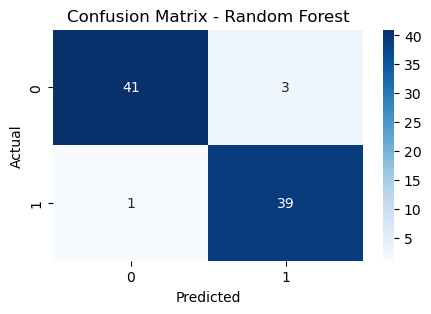

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # Importing plt module

# Assuming clf is your trained RandomForestClassifier
y_pred = gs.predict(X_test)  # Use gs instead of clf if you want to use the grid search optimized model

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


## RF feature info

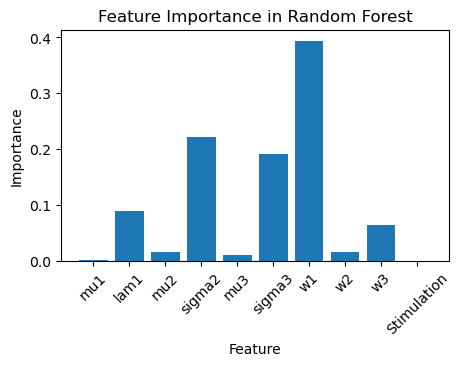

In [64]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming X_train is your feature matrix and y_train is your target
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

feature_importances = forest.feature_importances_
feature_names = X.columns  # Assuming X is your DataFrame without the target column

plt.figure(figsize=(5, 3))
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)
plt.show()


# Logistic Regression

In [65]:
params = {'C': np.logspace(-3, 3, 50), 'penalty': ['l1', 'l2']}

clf = LogisticRegression(solver='liblinear',random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)

gs=gs.fit(X_train,y_train)

## LR metrics

In [66]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)

Best parameters set found : {'C': 2.023589647725158, 'penalty': 'l1'} 

Classification report on Test set

Accuracy:  0.976
Recall:  0.975
Precision:  0.975
ROC AUC:  0.976


## LR matrix

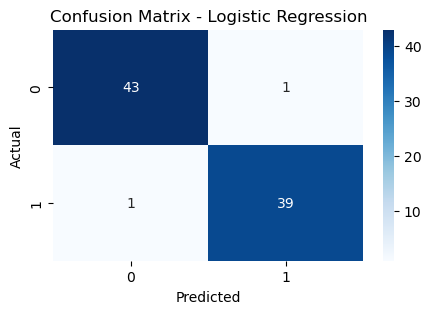

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # Importing plt module

# Assuming log_reg is your trained Logistic Regression model
y_pred = gs.predict(X_test)  # Use gs instead of log_reg if you want to use the grid search optimized model

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## LR feature info

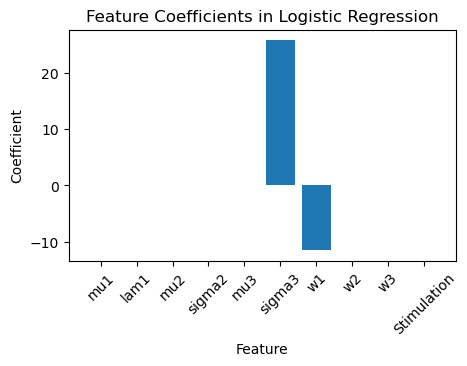

In [68]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming log_reg is your trained Logistic Regression model
coefficients = gs.best_estimator_.coef_[0]  # Use gs.best_estimator_ to get the best model from grid search
feature_names = X.columns  # Assuming X is your DataFrame without the target column

plt.figure(figsize=(5, 3))
plt.bar(feature_names, coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients in Logistic Regression')
plt.xticks(rotation=45)
plt.show()


# 4-Class 

In [70]:
list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP thresh 3/*.txt")

# List to hold individual DataFrames
dfs = []

# Iterate through each file in the directory
for file in list_dir:
    # Read the file into a DataFrame
    #file_path = os.path.join(directory, filename)
    df = pd.read_csv(file) #, delimiter='\t')  # Assuming tab-separated values
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as CSV
merged_df.to_csv("merged_data.csv", index=False)
dataset_after=merged_df

dataset_after = dataset_after.drop(['Unnamed: 0'],axis=1)
dataset_after

,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,Target,Stimulation
0,0.029989,0.023791,0.050000,0.025455,0.301780,0.317919,0.814444,0.185555,4.704015e-07,0.0,1.0
1,0.030000,0.023087,0.050000,0.025142,0.273312,0.328372,0.813396,0.186604,3.058176e-12,0.0,1.0
2,0.028645,0.024061,0.050000,0.029190,0.180386,0.221539,0.804252,0.195748,2.771986e-30,0.0,1.0
3,0.030000,0.024694,0.050000,0.017556,0.272991,0.290797,0.918604,0.081396,5.773332e-11,0.0,1.0
4,0.030000,0.024102,0.051366,0.010000,0.255269,0.292689,0.917414,0.082586,2.747613e-15,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
683,0.030000,0.024695,0.059022,0.036943,0.100000,0.106931,0.435041,0.311040,2.539190e-01,0.0,0.0
684,0.030000,0.026658,0.053893,0.049967,0.100000,0.123759,0.376015,0.450747,1.732381e-01,0.0,0.0
685,0.029975,0.025515,0.056269,0.033665,0.102328,0.103310,0.341048,0.360353,2.985997e-01,0.0,0.0
686,0.030000,0.022255,0.052986,0.031594,0.100000,0.098919,0.366657,0.305299,3.280442e-01,0.0,0.0


In [71]:
print('Target LRRK2 vs Healthy\n',dataset_after['Target'].value_counts())
print('Stimulated LRRK2 vs Healthy\n',dataset_after['Stimulation'].value_counts())

Target LRRK2 vs Healthy
 0.0    405
1.0    283
Name: Target, dtype: int64
Stimulated LRRK2 vs Healthy
 1.0    355
0.0    333
Name: Stimulation, dtype: int64


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
#dataset = pd.read_csv("dataset_after.csv")
dataset=dataset_after
# Combine "target" and "stimulation" columns to create a new categorical variable
#dataset['class'] = dataset['Target'].astype(int) + dataset['Stimulation'].astype(int)
dataset['class'] = np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 0), 0,
                   np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 1), 1,
                   np.where((dataset['Target'] == 1) & (dataset['Stimulation'] == 0), 2, 3)))


# Split the dataset into features (X) and target variable (y)
X = dataset.drop(["Stimulation", "Target", "class"], axis=1)
y = dataset["class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Tree

In [105]:
print("Classification report on Test set\n")
gs = DecisionTreeClassifier(max_depth=7,random_state=12)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred,average = 'weighted'),3)
precision = round(precision_score(y_true, y_pred,average = 'weighted'),3)
#roc_auc = round(roc_auc_score(y_true, y_pred,multi_class = 'ovr'),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)

Classification report on Test set

Accuracy:  0.725
Recall:  0.725
Precision:  0.743


Text(29.749999999999993, 0.5, 'True')

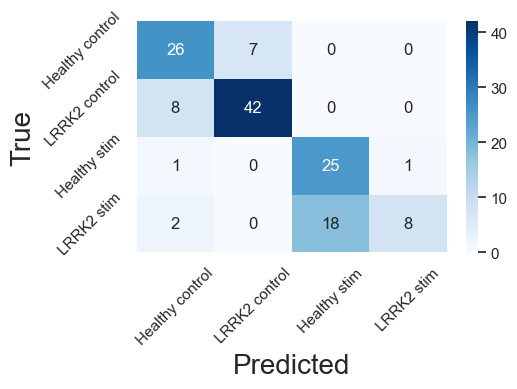

In [119]:
#print('ROC AUC: ',roc_auc)
from sklearn import metrics
cm=metrics.confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,3))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

# Random Forest

In [128]:
from hyperopt.pyll import scope
from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import cross_val_score
#@scope.define
#def intero(a):
#     return int(a)

In [133]:
from hyperopt import hp

space = {}


#RF
space['n_estimators'] = hp.choice('n_estimators', np.arange(50, 300,1, dtype=int))
space['max_samples'] = hp.uniform('max_samples',0.4,1)
space['max_features'] = hp.uniform('max_features',0.4,1)
space['criterion'] = hp.choice('criterion',['gini','entropy'])
space['max_depth'] = scope.int(hp.quniform('max_depth',3,10,1))
space['ccp_alpha']=hp.uniform('ccp_alpha',0,0.001)
#space['bootstrap']=hp.choice('bootstrap',[False,True])
space['bootstrap'] = hp.choice('bootstrap', [True])
space['min_samples_leaf']=scope.int(hp.quniform('min_samples_leaf',1,5,1))
space['min_samples_split']=scope.int(hp.quniform('min_samples_split',2,10,1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def objective(params):
        ######################## hyper params ##############################

        params_RF = {}
        
        params_RF['n_estimators'] = params['n_estimators']
        params_RF['max_samples'] = params['max_samples']
        params_RF['max_features'] = params['max_features']
        params_RF['criterion'] = params['criterion']
        params_RF['max_depth'] = params['max_depth']
        params_RF['ccp_alpha'] = params['ccp_alpha']
        params_RF['bootstrap'] = params['bootstrap']
        params_RF['min_samples_leaf'] = params['min_samples_leaf']
        params_RF['min_samples_split'] = params['min_samples_split']
        

        ########################## Classifier definition ###################

        classifier = RandomForestClassifier(n_jobs=-1)
        classifier.set_params(**params_RF)

        
        ######################### Model testing ################################

        shuffle = StratifiedKFold(n_splits=4, shuffle=True, random_state=12)
        
        

        score = cross_val_score(classifier, X_train, y_train, cv=shuffle, scoring='accuracy', n_jobs=-1)
        score = np.mean(score)
        
        

        return 1 - score

    ######################## Start optim ####################################



# The Trials object will store details of each iteration
trials = Trials()

    # Run the hyperparameter search using the tpe algorithm
best = fmin(objective,
                space,
                algo=tpe.suggest,
                max_evals=500,
                trials=trials)

 52%|███▌   | 258/500 [05:01<07:17,  1.81s/trial, best loss: 0.2109779964032582]

In [132]:
cat = {}
cat['n_estimators'] = np.arange(50, 150, dtype=int)
cat['bootstrap'] = [False,True]
cat['criterion'] = ['gini','entropy']
best_models = performance_visualizer(trials, 300, choice=True, **cat)

IndexError: list index out of range

In [ ]:
best_dict = best_models.to_dict(orient='records')[-1]

In [ ]:
best_dict.pop('performance')

In [ ]:
best_dict['min_samples_leaf']=int(best_dict['min_samples_leaf'])
best_dict['min_samples_split']=int(best_dict['min_samples_split'])

In [ ]:
print("Classification report on Test set\n")
gs = RandomForestClassifier()
gs.set_params(**best_dict)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred,average = 'weighted'),3)
precision = round(precision_score(y_true, y_pred,average = 'weighted'),3)
#roc_auc = round(roc_auc_score(y_true, y_pred,multi_class = 'ovr'),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
#print('ROC AUC: ',roc_auc)
cm=metrics.confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted Label',fontdict={'size':20})
plt.ylabel('True Label',fontdict={'size':20})

# Logistic Regression

In [109]:
print("Classification report on Test set\n")
gs = LogisticRegression(penalty='l2',C=0.5,random_state=12)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)



Classification report on Test set



In [111]:
accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred,average = 'weighted'),3)
precision = round(precision_score(y_true, y_pred,average = 'weighted'),3)
#roc_auc = round(roc_auc_score(y_true, y_pred,multi_class = 'ovr'),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
#print('ROC AUC: ',roc_auc)


Accuracy:  0.732
Recall:  0.732
Precision:  0.773


<Axes: >

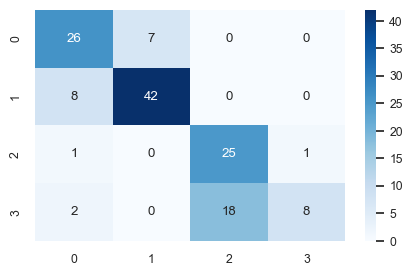

In [118]:
cm=metrics.confusion_matrix(y_true,y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (5,3))
sns.set(font_scale=0.8) # for label size
sns.heatmap(df_cm,annot=True,cmap="Blues")


In [116]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.7318840579710145
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        33
           1       0.86      0.84      0.85        50
           2       0.58      0.93      0.71        27
           3       0.89      0.29      0.43        28

    accuracy                           0.73       138
   macro avg       0.76      0.71      0.68       138
weighted avg       0.77      0.73      0.71       138



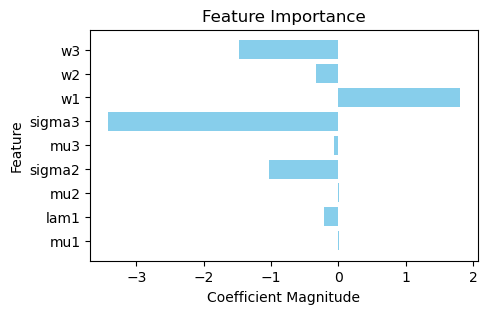

In [81]:
coefficients = model.coef_[0]

# Match coefficients with feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(5, 3))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

mu1
Healthy


TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

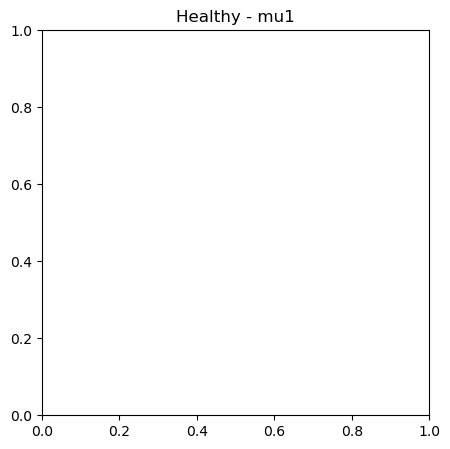

[CV 3/4; 711/1000] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.996 total time=   0.1s
[CV 2/4; 712/1000] START criterion=entropy, max_depth=3, n_estimators=25........
[CV 2/4; 712/1000] END criterion=entropy, max_depth=3, n_estimators=25;, score=0.967 total time=   0.1s
[CV 4/4; 712/1000] START criterion=entropy, max_depth=3, n_estimators=25........
[CV 4/4; 712/1000] END criterion=entropy, max_depth=3, n_estimators=25;, score=0.980 total time=   0.2s
[CV 1/4; 714/1000] START criterion=entropy, max_depth=3, n_estimators=56........
[CV 1/4; 714/1000] END criterion=entropy, max_depth=3, n_estimators=56;, score=0.999 total time=   0.2s
[CV 1/4; 715/1000] START criterion=entropy, max_depth=3, n_estimators=72........
[CV 1/4; 715/1000] END criterion=entropy, max_depth=3, n_estimators=72;, score=0.999 total time=   0.3s
[CV 1/4; 716/1000] START criterion=entropy, max_depth=3, n_estimators=87........
[CV 1/4; 716/1000] END criterion=entropy, max_depth=3, n_estimators=87;, sc

[CV 2/4; 725/1000] END criterion=entropy, max_depth=3, n_estimators=72;, score=0.967 total time=   0.3s
[CV 3/4; 726/1000] START criterion=entropy, max_depth=3, n_estimators=87........
[CV 3/4; 726/1000] END criterion=entropy, max_depth=3, n_estimators=87;, score=0.999 total time=   0.4s
[CV 2/4; 727/1000] START criterion=entropy, max_depth=3, n_estimators=103.......
[CV 2/4; 727/1000] END criterion=entropy, max_depth=3, n_estimators=103;, score=0.967 total time=   0.4s
[CV 2/4; 728/1000] START criterion=entropy, max_depth=3, n_estimators=118.......
[CV 2/4; 728/1000] END criterion=entropy, max_depth=3, n_estimators=118;, score=0.967 total time=   0.5s
[CV 2/4; 729/1000] START criterion=entropy, max_depth=3, n_estimators=134.......
[CV 2/4; 729/1000] END criterion=entropy, max_depth=3, n_estimators=134;, score=0.967 total time=   0.6s
[CV 1/4; 730/1000] START criterion=entropy, max_depth=3, n_estimators=150.......
[CV 1/4; 730/1000] END criterion=entropy, max_depth=3, n_estimators=150;

[CV 4/4; 707/1000] END criterion=entropy, max_depth=3, n_estimators=103;, score=0.973 total time=   0.4s
[CV 4/4; 708/1000] START criterion=entropy, max_depth=3, n_estimators=118.......
[CV 4/4; 708/1000] END criterion=entropy, max_depth=3, n_estimators=118;, score=0.971 total time=   0.4s
[CV 2/4; 709/1000] START criterion=entropy, max_depth=3, n_estimators=134.......
[CV 2/4; 709/1000] END criterion=entropy, max_depth=3, n_estimators=134;, score=0.967 total time=   0.5s
[CV 2/4; 710/1000] START criterion=entropy, max_depth=3, n_estimators=150.......
[CV 2/4; 710/1000] END criterion=entropy, max_depth=3, n_estimators=150;, score=0.967 total time=   0.8s
[CV 1/4; 711/1000] START criterion=entropy, max_depth=3, n_estimators=10........
[CV 1/4; 711/1000] END criterion=entropy, max_depth=3, n_estimators=10;, score=0.977 total time=   0.1s
[CV 4/4; 711/1000] START criterion=entropy, max_depth=3, n_estimators=10........
[CV 4/4; 711/1000] END criterion=entropy, max_depth=3, n_estimators=10;

[CV 4/4; 702/1000] END criterion=entropy, max_depth=3, n_estimators=25;, score=0.980 total time=   0.1s
[CV 3/4; 703/1000] START criterion=entropy, max_depth=3, n_estimators=41........
[CV 3/4; 703/1000] END criterion=entropy, max_depth=3, n_estimators=41;, score=0.999 total time=   0.2s
[CV 3/4; 704/1000] START criterion=entropy, max_depth=3, n_estimators=56........
[CV 3/4; 704/1000] END criterion=entropy, max_depth=3, n_estimators=56;, score=0.999 total time=   0.2s
[CV 2/4; 705/1000] START criterion=entropy, max_depth=3, n_estimators=72........
[CV 2/4; 705/1000] END criterion=entropy, max_depth=3, n_estimators=72;, score=0.967 total time=   0.3s
[CV 2/4; 706/1000] START criterion=entropy, max_depth=3, n_estimators=87........
[CV 2/4; 706/1000] END criterion=entropy, max_depth=3, n_estimators=87;, score=0.967 total time=   0.3s
[CV 2/4; 707/1000] START criterion=entropy, max_depth=3, n_estimators=103.......
[CV 2/4; 707/1000] END criterion=entropy, max_depth=3, n_estimators=103;, s

In [73]:
for col in dataset_after.columns.tolist():
    print(col)
    print('Healthy')
    t = plot_boxplot(0,col,dataset,dataset_after)
    print('LRRK2')
    t = plot_boxplot(1,col,dataset,dataset_after)
    print('\n\n')

In [72]:
def plot_boxplot(target,column,dataset,dataset_after):
    x_list_param_boxplot=[]
    y_list_param_boxplot=[]


    y_list_param_boxplot.extend(dataset[dataset['Target']==target][column].values)
    len1 = dataset[dataset['Target']==target][column].values.shape[0]
    y_list_param_boxplot.extend(dataset_after[(dataset_after['Target']==target) &(dataset_after['Stimulation']==0)][column].values)
    len2 = dataset_after[(dataset_after['Target']==target) &(dataset_after['Stimulation']==0)][column].values.shape[0]
    y_list_param_boxplot.extend(dataset_after[(dataset_after['Target']==target) &(dataset_after['Stimulation']==1)][column].values)
    len3 = dataset_after[(dataset_after['Target']==target) &(dataset_after['Stimulation']==1)][column].values.shape[0]

    strs1 = ["Baseline" for x in range(len1)]
    strs2 = ["Control" for x in range(len2)]
    strs3 = ["Stimulated" for x in range(len3)]

    x_list_param_boxplot.extend(strs1)
    x_list_param_boxplot.extend(strs2)
    x_list_param_boxplot.extend(strs3)
    
    plt.figure(figsize=(5,5))
    
    if target==0:
        title = 'Healthy - '+column
    else:
        title = 'LRRK2 - '+column
    plt.title(title)
    sns.boxplot(x_list_param_boxplot,y_list_param_boxplot)
    
    #return y_list_param_boxplot
    stat,p_original=stats.shapiro(y_list_param_boxplot[:len1])
    stat,p=stats.shapiro(y_list_param_boxplot[len1:len1+len2])
    if (p>0.05) and (p_original>0.05):
        stat,t =stats.mannwhitneyu(y_list_param_boxplot[:len1],y_list_param_boxplot[len1:len1+len2],alternative='two-sided')
        print('Control: ',t)
    else:
        stat,t =stats.ttest_ind(y_list_param_boxplot[:len1],y_list_param_boxplot[len1:len1+len2])
        print('Control: ',t)
        
    stat,p=stats.shapiro(y_list_param_boxplot[len1+len2:])
    if (p>0.05) and (p_original>0.05):
        stat,t =stats.mannwhitneyu(y_list_param_boxplot[:len1],y_list_param_boxplot[len1+len2:],alternative='two-sided')
        print('Stimulation: ',t)
    else:
        stat,t =stats.ttest_ind(y_list_param_boxplot[:len1],y_list_param_boxplot[len1+len2:])
        print('Stimulation: ',t)

In [131]:
def performance_visualizer(trials_obj,n_models,choice=False,**choice_var):
    
    import pandas as pd
    
    performance = [1-t['result']['loss'] for t in trials_obj.trials]
    
    
    hyperparam= list(trials_obj.trials[0]['misc']['vals'].keys())
    
    values_dict ={}
    
    for i in hyperparam:
        
        values_dict[i]=[]
        
        for j in trials_obj.trials:
            
            if(len(j['misc']['vals'][i])==0):
                
                values_dict[i].append(np.NaN)
                
            else:
            
                values_dict[i].append(j['misc']['vals'][i][0])
                
    out = pd.DataFrame.from_dict(values_dict)
    
    out['performance'] = performance
    
    out=out.sort_values(by=['performance'])
    
    
    if choice:
        
        for i in list(choice_var.keys()):
        
            for j,_ in enumerate(choice_var[i]):
        
                out[i]=out[i].replace(j,choice_var[i][j])
    
    return out.tail(n_models)